In [234]:
import pandas as pd
import re
import matplotlib

In [378]:
meta_data = 'meta_data.json'
df = pd.read_json(meta_data)

In [379]:
df

,database,url,title,authors,journal,citations,publish_date,keywords,doi,journal_impact_factor
0,ieeexplore,https://ieeexplore.ieee.org/document/6027518,A visualization and modeling tool for security...,"[Reijo M. Savola ;, Petri Heinonen]",2011 Information Security for South Africa,10.0,2011,"[Measurement, Visualization, Authentication, D...",10.1109/ISSA.2011.6027518,NaN
1,sciencedirect,https://www.sciencedirect.com/science/article/...,Information security requirements – Interpreti...,"[{'surname': 'Gerber', 'first_name': 'Mariana'...",Computers & Security,21.0,5–6,"[Information security, Information security ma...",https://doi.org/10.1016/j.cose.2008.07.009,3.062
2,ieeexplore,https://ieeexplore.ieee.org/document/7166125,Cyber security operations centre: Security mon...,[Cyril Onwubiko],2015 International Conference on Cyber Situati...,6.0,2015,"[Monitoring, Business, Computer crime, System-...",10.1109/CyberSA.2015.7166125,NaN
3,sciencedirect,https://www.sciencedirect.com/science/article/...,Security Management Standards: A Mapping,"[{'surname': 'Haufe', 'first_name': 'Knut'}, {...",Procedia Computer Science,NaN,2016,"[Information Security, ISMS, Mapping, Processe...",https://doi.org/10.1016/j.procs.2016.09.221,NaN
4,sciencedirect,https://www.sciencedirect.com/science/article/...,Mapping the field of software life cycle secur...,"[{'surname': 'Morrison', 'first_name': 'Patric...",Information and Software Technology,3.0,2018,"[Metrics, Measurement, Security]",https://doi.org/10.1016/j.infsof.2018.05.011,2.921
...,...,...,...,...,...,...,...,...,...,...
137,sciencedirect,https://www.sciencedirect.com/science/article/...,A survey of security issues for cloud computing,"[{'surname': 'Khan', 'first_name': 'Minhaj Ahm...",Journal of Network and Computer Applications,77.0,2016,"[Cloud security, Cloud computing, Denial-of-se...",https://doi.org/10.1016/j.jnca.2016.05.010,5.273
138,ieeexplore,https://ieeexplore.ieee.org/document/7921989,A framework for measurability of security,"[Seraj Fayyad ;, Josef Noll]",2017 8th International Conference on Informati...,1.0,2017,"[Security, Measurement, Databases, Privacy, Sy...",10.1109/IACS.2017.7921989,NaN
139,ieeexplore,https://ieeexplore.ieee.org/document/5467019,A Formal Approach Enabling Risk-Aware Business...,"[Simon Tjoa ;, Stefan Jakoubi ;, Gernot Goluch...",IEEE Transactions on Services Computing,15.0,2010,"[Security, Unified modeling language, Risk man...",10.1109/TSC.2010.17,5.707
140,ieeexplore,https://ieeexplore.ieee.org/document/7367050,The effectiveness of corporate culture toward ...,"[Abdullah Almubark ;, Nobutoshi Hatanaka ;, Os...",2015 World Congress on Information Technology ...,133.0,2015,"[Decision support systems, Information securit...",10.1109/WCITCA.2015.7367050,NaN


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 10 columns):
database                 142 non-null object
url                      142 non-null object
title                    142 non-null object
authors                  142 non-null object
journal                  142 non-null object
citations                135 non-null float64
publish_date             140 non-null object
keywords                 142 non-null object
doi                      139 non-null object
journal_impact_factor    51 non-null float64
dtypes: float64(2), object(8)
memory usage: 11.2+ KB


In [381]:
# Optimizes the database column to categorys
df["database"] = df["database"].astype('category')

# Reassigned the publish date
df["publish_date"][1] = 2008
df["publish_date"][6] = 2018
df["publish_date"][17] = 2015
df["publish_date"][20] = 2018
df["publish_date"][62] = 2018
df["publish_date"][25] = 2013
df["publish_date"][31] = 2017
df["publish_date"][39] = 2010
df["publish_date"][53] = 2019
df["publish_date"][74] = 2017
df["publish_date"][80] = 2010
df["publish_date"][89] = 2018
df["publish_date"][110] = 2012
df["publish_date"][135] = 2017
df["publish_date"][87] = 2018

# All Integers for column publish date
df["publish_date"] = df["publish_date"].astype('int')
df["citations"].fillna(0, inplace=True)
df["citations"] = df["citations"].astype('int')
df["journal_impact_factor"].fillna(0, inplace=True)

# Rename columns
df.rename(columns={"publish_date": "year", "journal_impact_factor": "impact_factor"}, inplace=True)

# Removing url and doi column, since it isnÄt needed
df = df.drop(["url", "doi"], axis=1)

# Replacing list of dicts in authors column for sciencedirect papers with list of authors names
scidir_mask = df["database"] == 'sciencedirect'
f = lambda x: [f"{y['first_name']} {y['surname']}" for y in x]
df.loc[scidir_mask, 'authors'] = df.loc[scidir_mask, 'authors'].apply(f)

# Striping the authors names from whitespaces and semicolons ';'
authors_function = lambda x: [auth.strip('; ') for auth in x]
df["authors"] = df.loc[:, "authors"].apply(authors_function)

/home/zwoelfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/zwoelfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zwoelfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/zwoelfer/.local/lib/python3.7/site-packages/ipykernel_lau

In [382]:
df

,database,title,authors,journal,citations,year,keywords,impact_factor
0,ieeexplore,A visualization and modeling tool for security...,"[Reijo M. Savola, Petri Heinonen]",2011 Information Security for South Africa,10,2011,"[Measurement, Visualization, Authentication, D...",0.000
1,sciencedirect,Information security requirements – Interpreti...,"[Mariana Gerber, Rossouw von Solms]",Computers & Security,21,2008,"[Information security, Information security ma...",3.062
2,ieeexplore,Cyber security operations centre: Security mon...,[Cyril Onwubiko],2015 International Conference on Cyber Situati...,6,2015,"[Monitoring, Business, Computer crime, System-...",0.000
3,sciencedirect,Security Management Standards: A Mapping,"[Knut Haufe, Ricardo Colomo-Palacios, Srdan Dz...",Procedia Computer Science,0,2016,"[Information Security, ISMS, Mapping, Processe...",0.000
4,sciencedirect,Mapping the field of software life cycle secur...,"[Patrick Morrison, David Moye, Rahul Pandita, ...",Information and Software Technology,3,2018,"[Metrics, Measurement, Security]",2.921
...,...,...,...,...,...,...,...,...
137,sciencedirect,A survey of security issues for cloud computing,[Minhaj Ahmad Khan],Journal of Network and Computer Applications,77,2016,"[Cloud security, Cloud computing, Denial-of-se...",5.273
138,ieeexplore,A framework for measurability of security,"[Seraj Fayyad, Josef Noll]",2017 8th International Conference on Informati...,1,2017,"[Security, Measurement, Databases, Privacy, Sy...",0.000
139,ieeexplore,A Formal Approach Enabling Risk-Aware Business...,"[Simon Tjoa, Stefan Jakoubi, Gernot Goluch, Ge...",IEEE Transactions on Services Computing,15,2010,"[Security, Unified modeling language, Risk man...",5.707
140,ieeexplore,The effectiveness of corporate culture toward ...,"[Abdullah Almubark, Nobutoshi Hatanaka, Osamu ...",2015 World Congress on Information Technology ...,133,2015,"[Decision support systems, Information securit...",0.000


In [345]:
# Number of studies per author

In [ ]:
# Most published authors

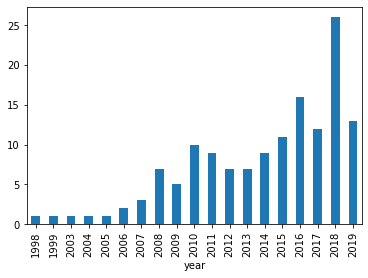

In [235]:
# Time series corelation. x: tiem in years, y: number of studies
df.groupby("year").size().plot(kind='bar')

In [236]:
# Journal types. Journals of Conference

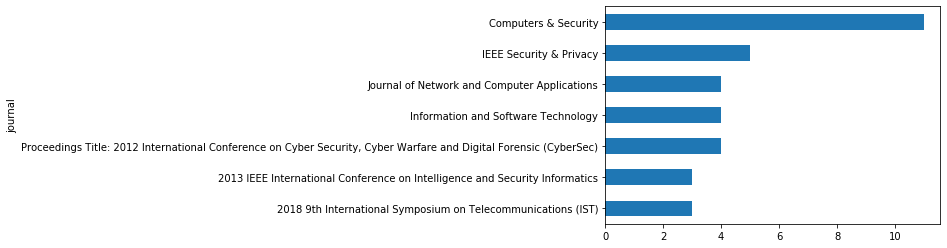

In [293]:
# Most published journals. Dropping all values with NotaJournal entry
df.groupby("journal").size().drop('NaJ').sort_values().tail(7).plot(kind='barh')

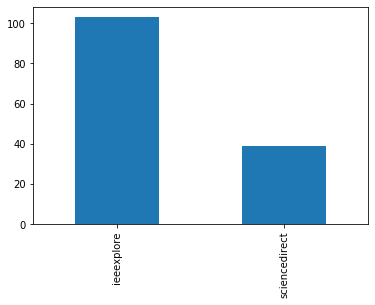

In [249]:
# Found papers in databases
used_databases = df["database"].value_counts()
used_databases.plot(kind='bar')

In [250]:
# Found conference papers. Usually withour an impact factor

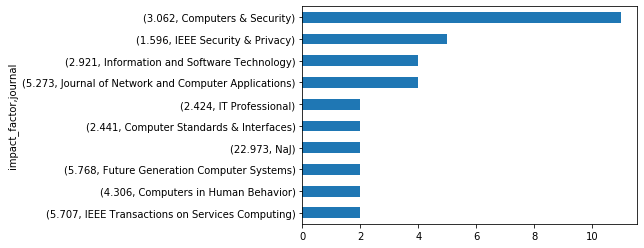

In [301]:
# Shows impact factors and journals that are most commonly used
df.groupby(["impact_factor", "journal"]).size().drop(0.000).sort_values().tail(
10).plot(kind='barh')

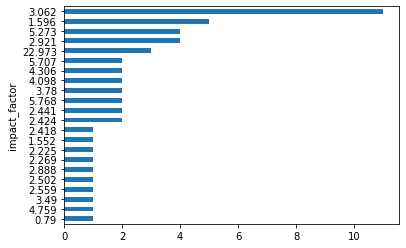

In [344]:
# Show highest impactfactors and journals used
# df.loc[:, ["journal", "impact_factor"]].sort_values(by="impact_factor").tail(18)
df.groupby("impact_factor").size().drop(0.000).sort_values().plot(kind='barh')